X : n samples, n features: (100, 2)
y : n samples (100,)
First five samples 
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
First five labels 
 [1 1 0 0 1]


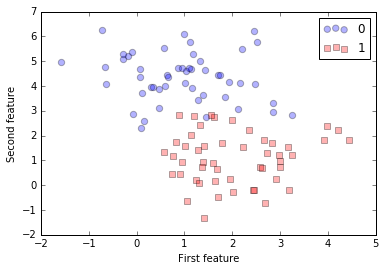

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X : n samples, n features:', X.shape)
print('y : n samples', y.shape)

print('First five samples \n', X[:5,:])
print('First five labels \n', y[:5])

plt.scatter(X[y==0,0], X[y==0,1], c='blue', marker='o',s=40, alpha=0.3, label='0')
plt.scatter(X[y==1,0], X[y==1,1], c='red', marker='s', s=40, alpha=0.3, label='1')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend(loc='upper right')



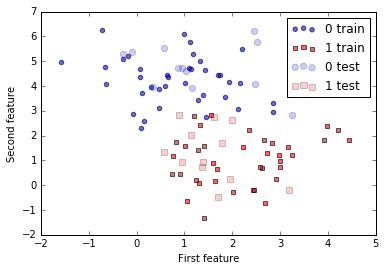

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1234, stratify=y)

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='blue', marker='o',s=20, alpha=0.6, label='0 train')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='red', marker='s', s=20, alpha=0.6, label='1 train')

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], c='blue', marker='o',s=40, alpha=0.2, label='0 test')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], c='red', marker='s', s=40, alpha=0.2, label='1 test')

plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend(loc='upper right')

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() # parameters can be added : (solver='lbfgs', max_iter=100000)
print(X_train.shape)
print(y_train.shape)
c = classifier.fit(X_train, y_train) #max_iter=1000)
print(c)
y_predict = classifier.predict(X_test)
print('prediction: ', y_predict)
print('actual val: ', y_test)
print('accuracy = ', np.sum((y_predict==y_test)/len(y_predict) * 100))
print('accuracy via mean: ', np.mean(y_predict == y_test))

#Even better scipy make the evaluation for you through the SCORE method
print('Score classifier on test set: ', classifier.score(X_test, y_test))
print('Score classifier on training set: ', classifier.score(X_train, y_train))




(76, 2)
(76,)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
prediction:  [0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0]
actual val:  [1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0]
accuracy =  87.5
accuracy via mean:  0.875
Score classifier on test set:  0.875
Score classifier on training set:  0.960526315789


coef classifier:  [[ 1.2018604  -1.50411111]]
Intercept classifier:  [ 1.70069099]


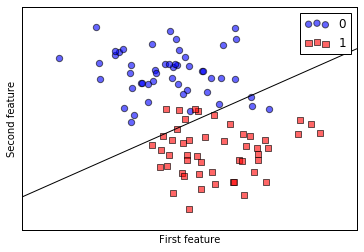

In [14]:
from figures import plot_2d_separator

plt.scatter(X[y==0,0], X[y==0,1], c='blue', marker='o',s=40, alpha=0.6, label='0')
plt.scatter(X[y==1,0], X[y==1,1], c='red', marker='s', s=40, alpha=0.6, label='1')

plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend(loc = 'upper right')

plot_2d_separator(classifier, X)

print('coef classifier: ',classifier.coef_)
print('Intercept classifier: ',classifier.intercept_)